<a href="https://colab.research.google.com/github/Anirudh-S/pytorch_initial/blob/main/simple_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [3]:
class Model(nn.Module):
  def __init__(self, in_feat=4,h1=8,h2=9,o_f=3):
    super().__init__()
    self.fc1=nn.Linear(in_feat,h1)
    self.fc2=nn.Linear(h1,h2)
    self.out=nn.Linear(h2,o_f)

  def forward(self,x):
    x=F.relu(self.fc1(x))
    x=F.relu(self.fc2(x))
    x=self.out(x)

    return x



In [4]:
torch.manual_seed(41)
model = Model()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
my_df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/0e7a9b0a5d22642a06d3d5b9bcbad9890c8ee534/iris.csv")

In [7]:
my_df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [8]:
my_df['species'] = my_df['species'].replace('setosa',0.0)
my_df['species'] = my_df['species'].replace('virginica',2.0)
my_df['species'] = my_df['species'].replace('versicolor',1.0)
my_df

<ipython-input-8-a3d6d4a2abc0>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  my_df['species'] = my_df['species'].replace('versicolor',1.0)


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [9]:
X=my_df.drop('species',axis=1)
y=my_df['species']
y

,species
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
145,2.0
146,2.0
147,2.0
148,2.0


In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=41)

In [12]:
x_train = torch.FloatTensor(x_train.to_numpy())
x_test = torch.FloatTensor(x_test.to_numpy())

In [13]:
y_train = torch.LongTensor(y_train.to_numpy())
y_test = torch.LongTensor(y_test.to_numpy())

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.01)

In [15]:
epochs = 500
losses = []

for i in range(epochs):
  y_pred = model.forward(x_train)
  loss = criterion(y_pred,y_train)
  losses.append(loss.detach().numpy())
  print(f"epoch {i} and loss is {loss}")

  if i%10==0:
    print(f"epoch {i} and loss is {loss}")

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch 0 and loss is 1.1251550912857056
epoch 0 and loss is 1.1251550912857056
epoch 1 and loss is 1.1095242500305176
epoch 2 and loss is 1.0960756540298462
epoch 3 and loss is 1.0845398902893066
epoch 4 and loss is 1.073915719985962
epoch 5 and loss is 1.0637413263320923
epoch 6 and loss is 1.0538722276687622
epoch 7 and loss is 1.0440350770950317
epoch 8 and loss is 1.0337213277816772
epoch 9 and loss is 1.0227365493774414
epoch 10 and loss is 1.0096259117126465
epoch 10 and loss is 1.0096259117126465
epoch 11 and loss is 0.9954349398612976
epoch 12 and loss is 0.9828447103500366
epoch 13 and loss is 0.9664683938026428
epoch 14 and loss is 0.9485272169113159
epoch 15 and loss is 0.9305612444877625
epoch 16 and loss is 0.9112032651901245
epoch 17 and loss is 0.8891754150390625
epoch 18 and loss is 0.8652693629264832
epoch 19 and loss is 0.8407701253890991
epoch 20 and loss is 0.8157405853271484
epoch 20 and loss is 0.8157405853271484
epoch 21 and loss is 0.7899296283721924
epoch 22 and

Text(0.5, 0, 'epoch')

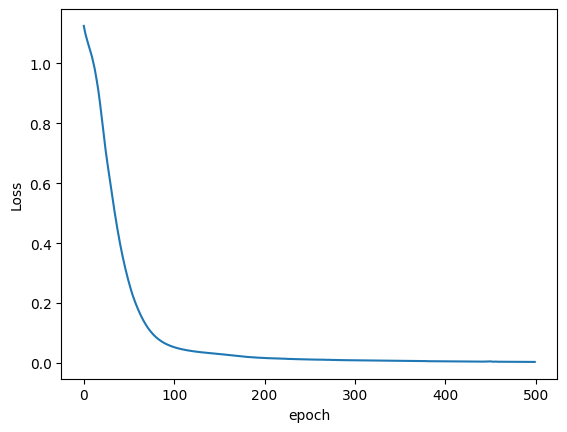

In [16]:
plt.plot(range(epochs),losses)
plt.ylabel("Loss")
plt.xlabel("epoch")

In [17]:
with torch.no_grad():
  y_eval = model.forward(x_test)
  loss = criterion(y_eval,y_test)
print(f"the loss is {loss}")


the loss is 0.4384576082229614


In [18]:
correct =0
with torch.no_grad():
  for i,data in enumerate(x_test):
    y_val = model.forward(data)
    print(f"{i+1}.) {str(y_val)} {y_test[i]}  {y_val.argmax().item()}")

    if y_val.argmax().item() == y_test[i]:
      correct+=1
print(f"accuracy is {correct/len(y_test)}")


1.) tensor([-8.5894,  1.0550, 15.0591]) 2  2
2.) tensor([-11.3995,  -2.5285,  23.2762]) 2  2
3.) tensor([-13.0535,  -2.1378,  25.6328]) 2  2
4.) tensor([  4.7107,  16.7978, -10.7461]) 1  1
5.) tensor([-10.9681,  -0.5287,  20.4242]) 2  2
6.) tensor([ 11.0652,  22.4912, -21.4391]) 1  1
7.) tensor([-6.8915,  3.7534, 11.6367]) 2  2
8.) tensor([  5.2742,  17.4829, -11.8447]) 1  1
9.) tensor([-9.9178,  0.6602, 17.4394]) 2  2
10.) tensor([-12.1878,  -2.7662,  24.8568]) 2  2
11.) tensor([-5.3122,  5.3232,  8.6352]) 2  2
12.) tensor([ 57.0080,  46.5485, -80.3782]) 0  0
13.) tensor([ 51.6795,  42.1082, -72.7907]) 0  0
14.) tensor([ 13.9329,  21.4961, -24.0116]) 1  1
15.) tensor([ 49.4827,  42.0434, -70.5107]) 0  0
16.) tensor([-3.0045,  8.0931,  4.1675]) 2  1
17.) tensor([ 52.2110,  42.8798, -73.7220]) 0  0
18.) tensor([-7.0688,  2.9400, 12.1095]) 1  2
19.) tensor([ 55.0000,  44.8746, -77.5186]) 0  0
20.) tensor([ 45.4450,  38.1535, -64.5415]) 0  0
21.) tensor([ 13.0289,  22.0199, -23.2928]) 1  

In [19]:
new_iris = torch.tensor([5.9,3.0,5.1,1.8])

In [20]:
with torch.no_grad():
  print(model.forward(new_iris))
  print(model.forward(new_iris).argmax().item())

tensor([-8.4194,  1.3700, 14.7262])
2


In [23]:
torch.save(model.state_dict(),'iris_test.pt')

In [24]:
new_iris = Model()
new_iris.load_state_dict(torch.load('iris_test.pt'))

<ipython-input-24-0a82628b324c>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  new_iris.load_state_dict(torch.load('iris_test.pt'))


<All keys matched successfully>

In [26]:
new_iris.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)